# 1. 라이브러리

In [1]:
import numpy as np
import pandas as pd

import os
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib
font_loc = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter

# '-' 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 불러오기

In [2]:
df = pd.read_csv('./data/visualization_train.csv')
df_dmg = pd.read_csv('./data/df_damage.csv')

# 3. 자연재난(폭염, 한파, 호우, 대설) 발생 원인 분석

한반도는 크게 4대 기단을 갖고 있습니다.

이 4대 기단은 한반도의 날씨에 큰 영향을 끼치고 있습니다.

- 고온다습한 북태평양 기단

- 한랭건조한 시베리아 기단

- 한랭다습한 오호츠크해 기단

- 온난건조한 양쯔강 기단

양쯔강 기단은 주로 봄에 황사를 유발하는 기단이므로 본 분석에서는 다루지 않습니다.

# 4-1. 4대 기단이 폭염/호우에 미치는 영향

### 북태평양 기단 + 오호츠크해 기단

북태평양 기단과 오호츠크해 기단은 주로 여름에 발생하는 자연재난에 영향을 미칩니다.

그 과정은 다음과 같습니다.

① 남쪽의 북태평양 고기압과 북쪽의 오호츠크해 고기압이 형성됩니다.

② 북태평양에서 고온다습한 바람과 오호츠크해의 한랭다습한 바람이 만나 장마전선을 형성합니다.

③ 북태평양 고기압 세력이 오호츠크해 고기압 세력보다 강해지면 장마는 끝나고 폭염이 찾아옵니다.

따라서 한국의 6 ~ 8월 남, 북 지역의 기압들의 차이를 살펴보겠습니다.

In [3]:
def rain_hot(df, loc):
    rain_hot_df = pd.DataFrame()
    for i in [6, 7, 8]:
        temp = df[df['지점명']==loc]
        df_temp = temp[temp['월']==i]
        rain_hot_df = pd.concat([rain_hot_df, df_temp])
        rain_hot_df = rain_hot_df.sort_values(by = ['연도', '월', '일'])
    return rain_hot_df

In [4]:
def subs(df, big, small):
    df['기압차'] = big['평균_현지기압'].values - small['평균_현지기압'].values
    df['평균_기온차'] = big['평균_기온'].values - small['평균_기온'].values
    df['최소_기온차'] = big['최저_기온'].values - small['최저_기온'].values
    return df

In [5]:
summer = subs(rain_hot(df, '서울'), rain_hot(df, '제주'), rain_hot(df, '철원'))
summer['여름_폭염'] = summer['여름_폭염'].apply(lambda x: x*300)

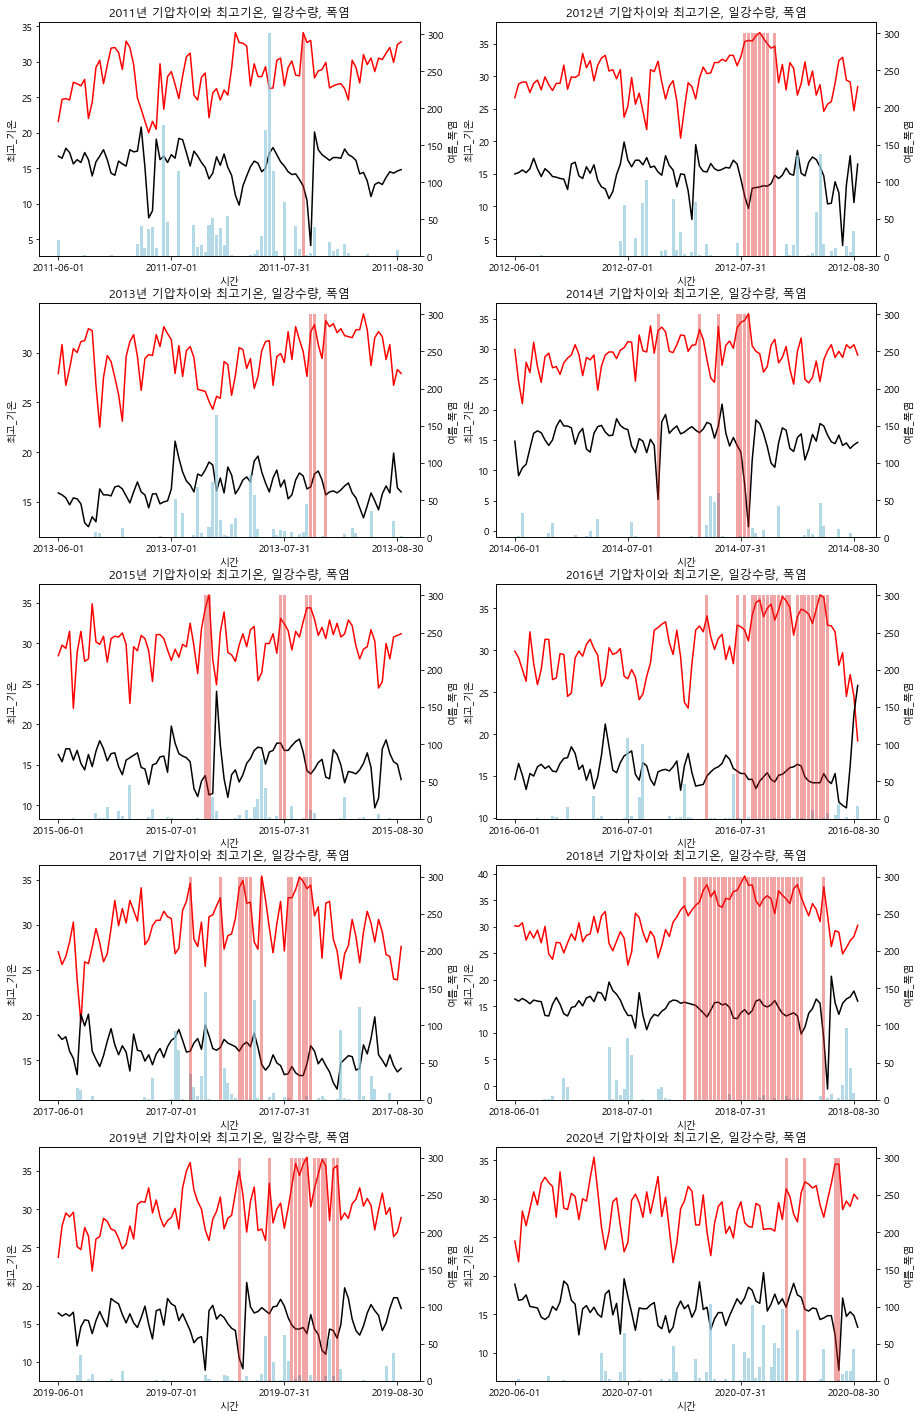

In [6]:
fig, ax = plt.subplots(5, 2, figsize=(15, 25))
year_list = list(range(2011, 2021, 1))
cnt = 0

for i in range(5):
    for j in range(2):
        ax2 = ax[i][j].twinx()
        sns.barplot(data=summer[summer['연도']==year_list[cnt]], x='시간', y='일강수량', ax=ax2, color='skyblue', alpha=0.7)
        sns.barplot(data=summer[summer['연도']==year_list[cnt]], x='시간', y='여름_폭염', ax=ax2, color='red', alpha=0.4)
        sns.lineplot(data=summer[summer['연도']==year_list[cnt]], x='시간', y='최고_기온', ax=ax[i][j], color='red')
        sns.lineplot(data=summer[summer['연도']==year_list[cnt]], x='시간', y='기압차', ax=ax[i][j], color='black')
        
        ax[i][j].set_title(f'{year_list[cnt]}년 기압차이와 최고기온, 일강수량, 폭염')
        ax[i][j].xaxis.set_major_locator(MultipleLocator(30))
        ax2.xaxis.set_major_locator(MultipleLocator(30))
        plt.xticks(rotation=45)
        cnt += 1

plt.show()

# 4-2. 기압 차에 따른 폭염/호우 분석

북태평양 기단의 기압과 오호츠크해 기단의 기압 데이터를 수집하는 것은 현실적으로 어렵습니다.

따라서 북태평양 기단의 기압을 제주의 기압으로, 오호츠크해 기단의 기압을 철원의 기압으로 가정하고 기압 차이를 시각화했습니다.

물론 기압 차이만으로 기온과 강수를 예측하는 것은 근거가 다소 부족합니다.

하지만 기압 차이가 급격하게 감소한 후 며칠간 장마를 확인할 수 있었고, 급격하게 증가한 후에는 기온이 상승하는 결과를 확인했습니다.

# 5-1. 4대 기단이 한파에 미치는 영향

### 시베리아 기단

겨울에는 시베리아 기단의 영향을 많이 받습니다.

시베리아의 고기압과 알루샨(알래스카)의 저기압의 영향으로 한반도에 겨울철 동고서저의 기압배치가 됩니다.

이 기압배치 때문에 한반도는 서풍의 영향을 많이 받습니다.

따라서 한국의 11 ~ 2월 동부와 서부 지역의 기압 차이를 살펴보겠습니다.

In [7]:
df_winter = pd.DataFrame()
cnt = 0
for i in [11, 12, 1, 2]:
    cnt += 1
    temp = df[df['월']==i]
    temp['temp'] = cnt
    df_winter = pd.concat([df_winter, temp])
west = ['인천', '서산', '보령', '군산', '고창', '목포']
east = ['속초', '강릉', '동해', '울진', '포항', '울산']

df_winter_west = pd.DataFrame()
for i in west:
    temp = df_winter[df_winter['지점명']==i]
    df_winter_west = pd.concat([df_winter_west, temp])

df_winter_east = pd.DataFrame()
for i in east:
    temp = df_winter[df_winter['지점명']==i]
    df_winter_east = pd.concat([df_winter_east, temp])

df_winter_west.sort_values(by=['연도', '월'], inplace=True)
df_winter_east.sort_values(by=['연도', '월'], inplace=True)
    
df_winter_seoul = df_winter[df_winter['지점명']=='서울']
df_winter_seoul.reset_index(drop = True, inplace=True)

df_winter_west = df_winter_west.groupby(['시간']).mean().reset_index(drop=True)
df_winter_east = df_winter_east.groupby(['시간']).mean().reset_index(drop=True)
df_winter_west['시간'] = df_winter_seoul['시간']
df_winter_east['시간'] = df_winter_seoul['시간']

cold = subs(df_winter_seoul, df_winter_west, df_winter_east)
cold.sort_values(by=['연도', '월'], inplace=True)

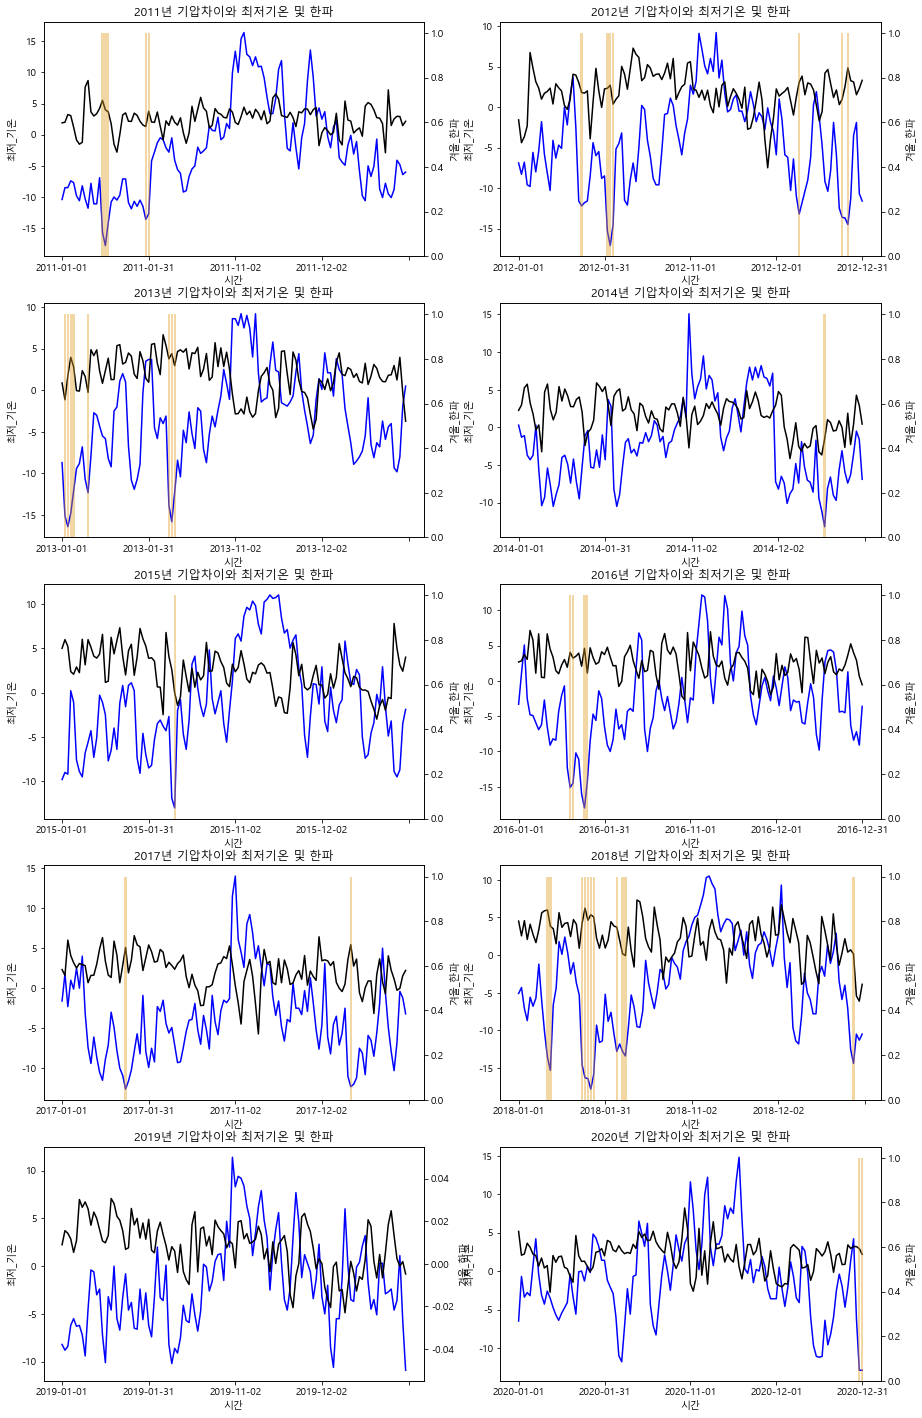

In [8]:
fig, ax = plt.subplots(5, 2, figsize=(15, 25))
year_list = list(range(2011, 2021, 1))
cnt = 0
for i in range(5):
    for j in range(2):
        ax2 = ax[i][j].twinx()
        sns.barplot(data=cold[cold['연도']==year_list[cnt]], x='시간', y='겨울_한파', ax=ax2, color='orange', alpha=0.4)
        sns.lineplot(data=cold[cold['연도']==year_list[cnt]], x='시간', y='최저_기온', ax=ax[i][j], color='blue')
        sns.lineplot(data=cold[cold['연도']==year_list[cnt]], x='시간', y='기압차', ax=ax[i][j], color='black')

        ax[i][j].set_title(f'{year_list[cnt]}년 기압차이와 최저기온 및 한파')
        ax[i][j].xaxis.set_major_locator(MultipleLocator(30))
        ax2.xaxis.set_major_locator(MultipleLocator(30))
        plt.xticks(rotation=45)
        cnt += 1

plt.show()

# 5-2. 기압 차에 따른 한파 분석

한파는 기압 차가 클수록 시베리아에서 내려온 차가운 공기가 많아지기 때문에 기온이 떨어집니다.

- 서부 기압 : 수집 데이터에서 서부 지역에 해당하는 인천, 서산, 보령, 군산, 고창, 목포 기압의 평균을 사용

- 동부 기압 : 수집 데이터에서 동부 지역에 해당하는 속초, 강릉, 동해, 울진, 포항, 울산 기압의 평균을 사용

기압 차이가 0 이상(서풍)이고 급격하게 차이나면 기온이 낮은 것을 볼 수 있습니다.

기압 차이가 0 이하(동풍)면 기온이 비교적 높은 것을 볼 수 있습니다.

# 6-1. 4대 기단이 대설에 미치는 영향

### 시베리아 기단 + 오호츠크해 기단

한파에서 언급했듯이 한반도는 겨울철에 주로 서풍의 영향을 받습니다.

시베리아에서 불어오는 한랭건조한 공기가 서해에서 습기를 채우고 태백산맥과 만나면 눈이 내립니다.

대설은 태백산맥을 넘지 못한 서풍이 원인이 되기도 하지만,

강릉과 울릉도의 경우에는 시베리아에서 불어오는 한기가 개마고원을 넘지 못하고 산을 우회하면서 동풍이 원인이 됩니다.

개마고원을 넘지 못하고 우회한 한기는 동해의 습기를 머금고 태백산맥 동쪽에서 많은 눈이 되어 내립니다.

따라서 태백산맥의 좌측인 서울, 태백산맥에 위치한 대관령, 태백산맥의 우측인 강릉의 지표를 비교해보겠습니다.

In [9]:
loc = ['대관령', '북강릉', '서울']
df_snow = pd.DataFrame()
for i in loc:
    df_temp = df_winter[df_winter['지점명']==i]
    df_snow = pd.concat([df_snow, df_temp])
df_snow = df_snow.sort_values(by = ['지점명', '연도', '월', '일'])
df_snow.reset_index(drop = True, inplace = True)

df_seoul = df_snow[df_snow['지점명']=='서울']
df_dae = df_snow[df_snow['지점명']=='대관령']
df_gang = df_snow[df_snow['지점명']=='북강릉']

df_dae['서울_대관령_기압차'] = df_seoul['평균_현지기압'].values - df_dae['평균_현지기압'].values
df_dae['강릉_대관령_기압차'] = df_gang['평균_현지기압'].values - df_dae['평균_현지기압'].values

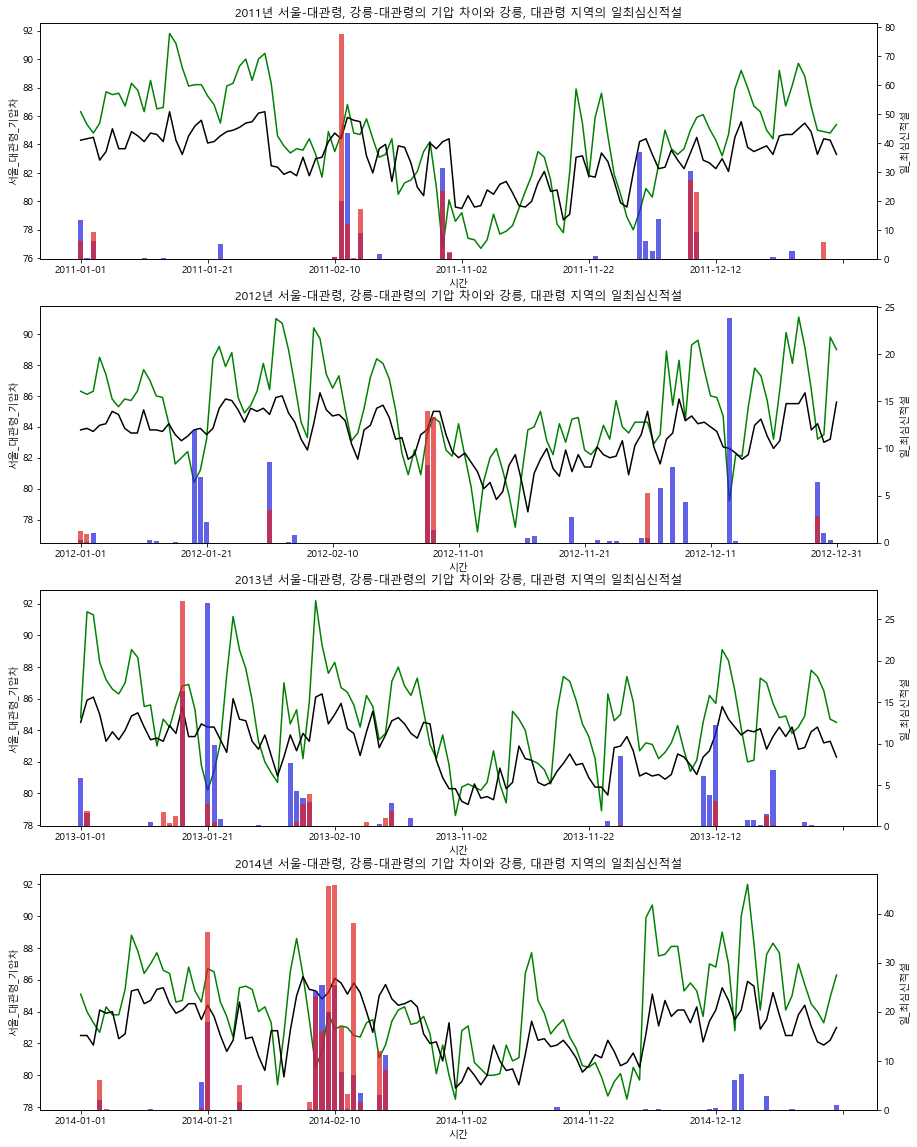

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(15, 20))
year_list = list(range(2011, 2015, 1))
cnt = 0
for i in range(4):
    ax2 = ax[i].twinx()
    sns.barplot(data = df_dae[df_dae['연도']==year_list[cnt]], x='시간', y='일_최심신적설', ax=ax2, color='blue', alpha=0.7)
    sns.barplot(data = df_gang[df_gang['연도']==year_list[cnt]], x='시간', y='일_최심신적설', ax=ax2, color='red', alpha=0.7)
    sns.lineplot(data=df_dae[df_dae['연도']==year_list[cnt]], x='시간', y='서울_대관령_기압차', ax=ax[i], color = 'green')
    sns.lineplot(data=df_dae[df_dae['연도']==year_list[cnt]], x='시간', y='강릉_대관령_기압차', ax=ax[i], color = 'black')

    ax[i].set_title(f'{year_list[cnt]}년 서울-대관령, 강릉-대관령의 기압 차이와 강릉, 대관령 지역의 일최심신적설')
    ax[i].xaxis.set_major_locator(MultipleLocator(20))
    ax2.xaxis.set_major_locator(MultipleLocator(20))
    plt.xticks(rotation=45)
    cnt += 1

plt.show()

# 6-2. 기압 차에 따른 대설 분석

시베리아에서 한반도 서쪽으로 불어오는 차가운 공기와 한반도 동쪽으로 불어오는 차가운 공기는 태백산맥을 넘지 못하고 눈 또는 비가 됩니다.

서풍은 서울과 대관령의 기압 차이로 판단했고 동풍은 강릉과 대관령의 기압 차이로 판단했습니다.

- 서울의 기압 - 대관령의 기압 > 강릉의 기압 - 대관령의 기압 : 대관령에 적설량이 많을 것으로 추측

- 강릉의 기압 - 대관령의 기압 > 서울의 기압 - 대관령의 기압 : 강릉에 적설량이 많을 것으로 추측

시각화를 해본 결과는 다음과 같습니다.

강릉의 적설량이 압도적으로 많을 경우, 강릉과 대관령의 기압 차이가 큰 경우가 많았습니다.

대관령의 적설량이 압도적으로 많을 경우, 서울과 대관령의 기압 차이가 큰 경우가 많았습니다.